In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import os

# Setup tech chips

In [2]:
os.chdir("D:\\Trading\\Data\\quantmod\\US\\")

symbol_list = ['NFLX','AMZN','NVDA','ADBE','AAPL']

df_NFLX = pd.read_csv('adj_NFLX.csv',index_col='date',parse_dates=True)
df_AMZN = pd.read_csv('adj_AMZN.csv',index_col='date',parse_dates=True)
df_NVDA = pd.read_csv('adj_NVDA.csv',index_col='date',parse_dates=True)
df_ADBE = pd.read_csv('adj_ADBE.csv',index_col='date',parse_dates=True)
df_AAPL = pd.read_csv('adj_AAPL.csv',index_col='date',parse_dates=True)

In [3]:
df_NFLX = df_NFLX.loc[dt.date(year=2010,month=1,day=1):dt.date(year=2019,month=1,day=1)]
df_AMZN = df_AMZN.loc[dt.date(year=2010,month=1,day=1):dt.date(year=2019,month=1,day=1)]
df_NVDA = df_NVDA.loc[dt.date(year=2010,month=1,day=1):dt.date(year=2019,month=1,day=1)]
df_ADBE = df_ADBE.loc[dt.date(year=2010,month=1,day=1):dt.date(year=2019,month=1,day=1)]
df_AAPL = df_AAPL.loc[dt.date(year=2010,month=1,day=1):dt.date(year=2019,month=1,day=1)]

## zip()

In [4]:
a = range(5)
b = range(6,10)
c = range(11,15)
zip_abc = zip(a,b,c)
list(zip_abc)

[(0, 6, 11), (1, 7, 12), (2, 8, 13), (3, 9, 14)]

In [5]:
chip_list = [df_NFLX,df_AMZN,df_NVDA,df_ADBE,df_AAPL]

for df,name in zip(chip_list,symbol_list):
    df[str(name+'.Normed_Close')] = df.iloc[:,3]/df.iloc[0,3]

In [6]:
df_NFLX.head()

,NFLX.Open,NFLX.High,NFLX.Low,NFLX.Close,NFLX.Volume,NFLX.Normed_Close
date,,,,,,
2010-01-04,7.931421,7.961421,7.565707,7.639992,17239617,1.000000
2010-01-05,7.652849,7.657135,7.258564,7.358564,23753123,0.963164
2010-01-06,7.361421,7.672849,7.197136,7.617135,23290423,0.997008
2010-01-07,7.731421,7.757135,7.462935,7.485707,9955409,0.979806
2010-01-08,7.498564,7.742849,7.465707,7.614278,8180908,0.996634


# Allocation ratio 

In [7]:
allo_NFLX = 0.2
allo_AMZN = 0.2
allo_NVDA = 0.2
allo_ADBE = 0.2
allo_AAPL = 1 - allo_NFLX - allo_AMZN - allo_NVDA - allo_ADBE

allo_vect = [allo_NFLX,allo_AMZN,allo_NVDA,allo_ADBE,allo_AAPL]

In [8]:
# Use zip() to take tuples from the two list

for name,df,allo in zip(symbol_list,chip_list,allo_vect):
    df[str(name+'.Position_Value')] = 10000 * df[str(name+'.Normed_Close')] * allo
    
df_NFLX.head()

,NFLX.Open,NFLX.High,NFLX.Low,NFLX.Close,NFLX.Volume,NFLX.Normed_Close,NFLX.Position_Value
date,,,,,,,
2010-01-04,7.931421,7.961421,7.565707,7.639992,17239617,1.000000,2000.000000
2010-01-05,7.652849,7.657135,7.258564,7.358564,23753123,0.963164,1926.327599
2010-01-06,7.361421,7.672849,7.197136,7.617135,23290423,0.997008,1994.016455
2010-01-07,7.731421,7.757135,7.462935,7.485707,9955409,0.979806,1959.611070
2010-01-08,7.498564,7.742849,7.465707,7.614278,8180908,0.996634,1993.268512


In [9]:
df_NFLX.tail()

,NFLX.Open,NFLX.High,NFLX.Low,NFLX.Close,NFLX.Volume,NFLX.Normed_Close,NFLX.Position_Value
date,,,,,,,
2018-07-16,398.98,403.355,391.7500,400.48,22959984,52.418901,104837.801173
2018-07-17,346.95,385.000,344.0000,379.48,58410362,49.670207,99340.413477
2018-07-18,381.24,383.130,372.3552,375.13,21746266,49.100834,98201.668882
2018-07-19,371.06,375.749,363.0000,364.23,16878681,47.674131,95348.262888
2018-07-20,364.92,370.500,360.1400,361.05,15088358,47.257901,94515.801322


# Simple Portfolio

In [10]:
df_portfo = pd.concat((df[str(name+'.Position_Value')] for name,df in zip(symbol_list,chip_list)), axis = 1)
df_portfo.head()

,NFLX.Position_Value,AMZN.Position_Value,NVDA.Position_Value,ADBE.Position_Value,AAPL.Position_Value
date,,,,,
2010-01-04,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
2010-01-05,1926.327599,2011.799851,2029.204976,2032.892963,2003.457782
2010-01-06,1994.016455,1975.354742,2042.184965,2028.579132,1971.590113
2010-01-07,1959.611070,1941.747573,2002.163332,1989.215422,1967.945423
2010-01-08,1993.268512,1994.324122,2006.489995,1978.430844,1981.028924


In [11]:
df_portfo['Total_Value'] = df_portfo.sum(axis=1)

In [12]:
df_portfo.head()

,NFLX.Position_Value,AMZN.Position_Value,NVDA.Position_Value,ADBE.Position_Value,AAPL.Position_Value,Total_Value
date,,,,,,
2010-01-04,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,10000.000000
2010-01-05,1926.327599,2011.799851,2029.204976,2032.892963,2003.457782,10003.683171
2010-01-06,1994.016455,1975.354742,2042.184965,2028.579132,1971.590113,10011.725406
2010-01-07,1959.611070,1941.747573,2002.163332,1989.215422,1967.945423,9860.682819
2010-01-08,1993.268512,1994.324122,2006.489995,1978.430844,1981.028924,9953.542396


In [13]:
df_portfo.tail()

,NFLX.Position_Value,AMZN.Position_Value,NVDA.Position_Value,ADBE.Position_Value,AAPL.Position_Value,Total_Value
date,,,,,,
2018-07-16,104837.801173,27221.657954,28989.326840,13733.081693,14043.050151,188824.917811
2018-07-17,99340.413477,27541.896938,29630.549259,13928.821785,14082.771732,184524.453190
2018-07-18,98201.668882,27526.811053,29398.120732,14008.088434,14005.535324,183140.224425
2018-07-19,95348.262888,27079.462285,29436.664156,13894.850364,14114.401880,179873.641573
2018-07-20,94515.801322,27090.365945,29303.514146,13887.301159,14082.036147,178879.018719


Text(0.5,1,'Portfolio NAV since 2010')

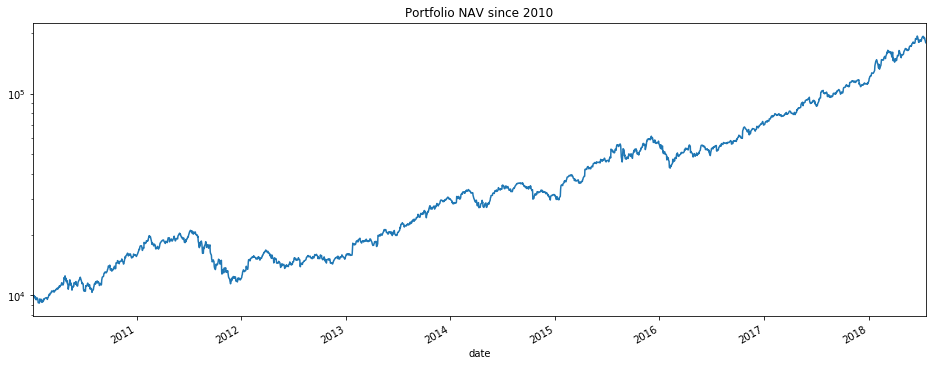

In [14]:
df_portfo['Total_Value'].plot(figsize=(16,6),logy=True)
plt.title('Portfolio NAV since 2010')

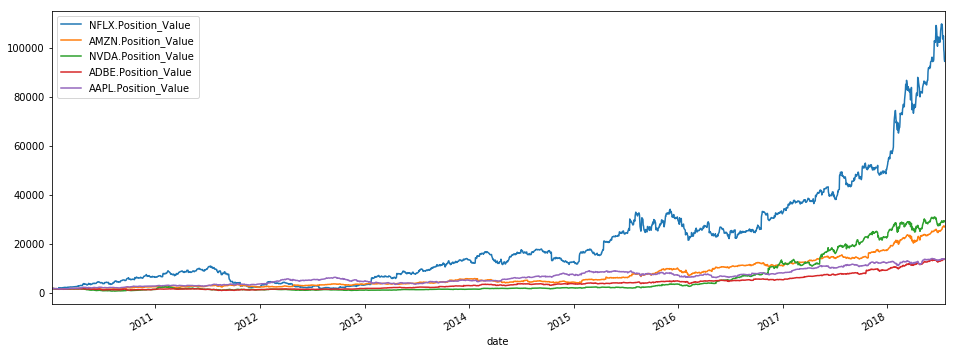

In [15]:
# df.drop(): Present all columns except the dropped columns

df_portfo.drop('Total_Value',axis=1).plot(kind='line',figsize=(16,6))

# Individual & Portfolio KPI

In [16]:
# Calculate individual symbol daily return
# col.pct_change(1) is equivalent to (col / col.shift(1) - 1)

mean_chg = []
sd_chg = []

for name,df in zip(symbol_list,chip_list):
    df[str(name+'.Return%')] = df[str(name+'.Normed_Close')].pct_change(1)
    mean_chg.append(df[str(name+'.Return%')].mean())
    sd_chg.append(df[str(name+'.Return%')].std())

In [17]:
df_NFLX.tail()

,NFLX.Open,NFLX.High,NFLX.Low,NFLX.Close,NFLX.Volume,NFLX.Normed_Close,NFLX.Position_Value,NFLX.Return%
date,,,,,,,,
2018-07-16,398.98,403.355,391.7500,400.48,22959984,52.418901,104837.801173,0.011824
2018-07-17,346.95,385.000,344.0000,379.48,58410362,49.670207,99340.413477,-0.052437
2018-07-18,381.24,383.130,372.3552,375.13,21746266,49.100834,98201.668882,-0.011463
2018-07-19,371.06,375.749,363.0000,364.23,16878681,47.674131,95348.262888,-0.029057
2018-07-20,364.92,370.500,360.1400,361.05,15088358,47.257901,94515.801322,-0.008731


In [18]:
test_chg = df_NFLX['NFLX.Normed_Close'] / df_NFLX['NFLX.Normed_Close'].shift(1) - 1
test_chg.tail()

date
2018-07-16    0.011824
2018-07-17   -0.052437
2018-07-18   -0.011463
2018-07-19   -0.029057
2018-07-20   -0.008731
Name: NFLX.Normed_Close, dtype: float64

In [19]:
# Average Daily return for each symbol

for name,num,sd in zip(symbol_list,mean_chg,sd_chg):
    print("Mean daily return for %s: %1.6f"%(name,num))
    print("Sd of daily return for %s: %1.6f"%(name,sd))

Mean daily return for NFLX: 0.002362
Sd of daily return for NFLX: 0.033874
Mean daily return for AMZN: 0.001401
Sd of daily return for AMZN: 0.019498
Mean daily return for NVDA: 0.001549
Sd of daily return for NVDA: 0.024761
Mean daily return for ADBE: 0.001051
Sd of daily return for ADBE: 0.017313
Mean daily return for AAPL: 0.001034
Sd of daily return for AAPL: 0.015899


In [20]:
df_portfo['Return%'] = df_portfo['Total_Value'].pct_change(1)
df_portfo.tail()

,NFLX.Position_Value,AMZN.Position_Value,NVDA.Position_Value,ADBE.Position_Value,AAPL.Position_Value,Total_Value,Return%
date,,,,,,,
2018-07-16,104837.801173,27221.657954,28989.326840,13733.081693,14043.050151,188824.917811,0.005291
2018-07-17,99340.413477,27541.896938,29630.549259,13928.821785,14082.771732,184524.453190,-0.022775
2018-07-18,98201.668882,27526.811053,29398.120732,14008.088434,14005.535324,183140.224425,-0.007502
2018-07-19,95348.262888,27079.462285,29436.664156,13894.850364,14114.401880,179873.641573,-0.017837
2018-07-20,94515.801322,27090.365945,29303.514146,13887.301159,14082.036147,178879.018719,-0.005530


In [21]:
mean_portfo = df_portfo['Return%'].mean()
sd_portfo = df_portfo['Return%'].std()

print("Mean daily return for Portfolio: %1.6f"%(mean_portfo))
print("SD of daily return for Portfolio: %1.6f"%(sd_portfo))

Mean daily return for Portfolio: 0.001499
SD of daily return for Portfolio: 0.017730


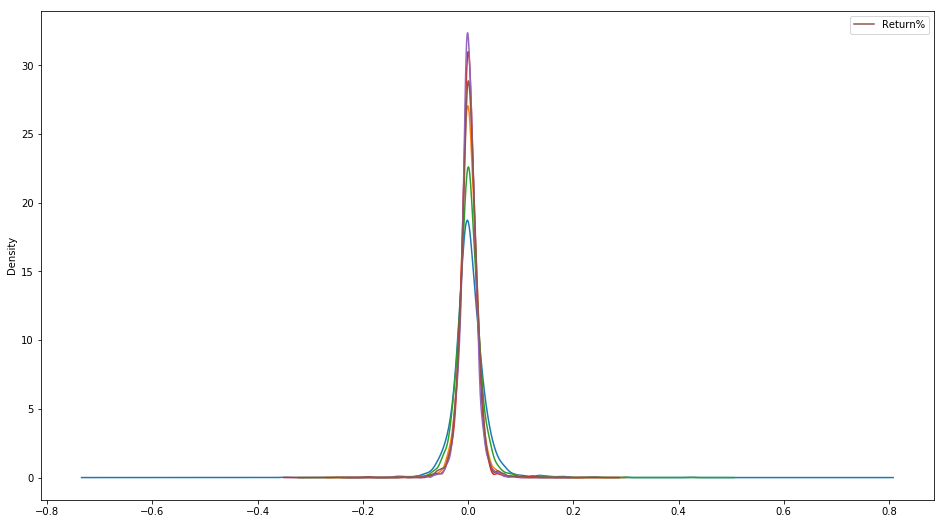

In [22]:
for name,df in zip(symbol_list,chip_list):
    df[str(name+'.Return%')].plot(kind='kde')
    
df_portfo['Return%'].plot(kind='kde',figsize=(16,9),legend=True)

# Sharpe Ratio

In [23]:
# Raw Sharpe Ratio
raw_sharpe = mean_portfo/sd_portfo

# Annualized Sharpe Ratio of portfolio
annual_sharpe = (252**0.5) * raw_sharpe
print("Annualized Sharpe Ratio of Portfolio: %1.6f"%(annual_sharpe))


Annualized Sharpe Ratio of Portfolio: 1.342075


In [24]:
# Sharpe Ratio for individual symbols

for name,num,sd in zip(symbol_list,mean_chg,sd_chg):
    symbol_sharpe = (252**0.5) * num / sd
    print("Annualized Sharpe Ratio for %s: %1.6f"%(name,symbol_sharpe))

Annualized Sharpe Ratio for NFLX: 1.106920
Annualized Sharpe Ratio for AMZN: 1.140831
Annualized Sharpe Ratio for NVDA: 0.993321
Annualized Sharpe Ratio for ADBE: 0.964118
Annualized Sharpe Ratio for AAPL: 1.032654


# Log-return & Log-Sharpe Ratio

In [25]:
mean_log = []
sd_log = []

for name,df in zip(symbol_list,chip_list):
    df[str(name+'.Log-return%')] = np.log(df[str(name+'.Normed_Close')]/df[str(name+'.Normed_Close')].shift(1))
    mean_log.append(df[str(name+'.Log-return%')].mean())
    sd_log.append(df[str(name+'.Log-return%')].std())

In [26]:
mean_log

[0.0017924778473822661,
 0.0012115439255817053,
 0.0012480521919990774,
 0.0009008961675240083,
 0.0009073699546366501]

In [27]:
for name,num,sd in zip(symbol_list,mean_log,sd_log):
    print("Mean log-return for %s: %1.6f"%(name,num))
    print("Sd of log-return for %s: %1.6f"%(name,sd))

Mean log-return for NFLX: 0.001792
Sd of log-return for NFLX: 0.033697
Mean log-return for AMZN: 0.001212
Sd of log-return for AMZN: 0.019418
Mean log-return for NVDA: 0.001248
Sd of log-return for NVDA: 0.024414
Mean log-return for ADBE: 0.000901
Sd of log-return for ADBE: 0.017347
Mean log-return for AAPL: 0.000907
Sd of log-return for AAPL: 0.015912


In [28]:
df_portfo['Log-return%'] = np.log(df_portfo['Total_Value']/df_portfo['Total_Value'].shift(1))
df_portfo.tail()

,NFLX.Position_Value,AMZN.Position_Value,NVDA.Position_Value,ADBE.Position_Value,AAPL.Position_Value,Total_Value,Return%,Log-return%
date,,,,,,,,
2018-07-16,104837.801173,27221.657954,28989.326840,13733.081693,14043.050151,188824.917811,0.005291,0.005277
2018-07-17,99340.413477,27541.896938,29630.549259,13928.821785,14082.771732,184524.453190,-0.022775,-0.023038
2018-07-18,98201.668882,27526.811053,29398.120732,14008.088434,14005.535324,183140.224425,-0.007502,-0.007530
2018-07-19,95348.262888,27079.462285,29436.664156,13894.850364,14114.401880,179873.641573,-0.017837,-0.017997
2018-07-20,94515.801322,27090.365945,29303.514146,13887.301159,14082.036147,178879.018719,-0.005530,-0.005545


In [29]:
# log-Sharpe Ratio for individual symbols

for name,num,sd in zip(symbol_list,mean_log,sd_log):
    symbol_log_sharpe = (252**0.5) * num / sd
    print("Annualized log-Sharpe Ratio for %s: %1.6f"%(name,symbol_log_sharpe))

Annualized log-Sharpe Ratio for NFLX: 0.844433
Annualized log-Sharpe Ratio for AMZN: 0.990467
Annualized log-Sharpe Ratio for NVDA: 0.811525
Annualized log-Sharpe Ratio for ADBE: 0.824417
Annualized log-Sharpe Ratio for AAPL: 0.905210


In [30]:
# Annualized log-Sharpe Ratio of portfolio

mean_log_portfo = df_portfo['Log-return%'].mean()
sd_log_portfo = df_portfo['Log-return%'].std()

annual_log_sharpe = (252**0.5) * mean_log_portfo / sd_log_portfo
print("Annualized Sharpe Ratio of Portfolio: %1.6f"%(annual_log_sharpe))

Annualized Sharpe Ratio of Portfolio: 1.199960


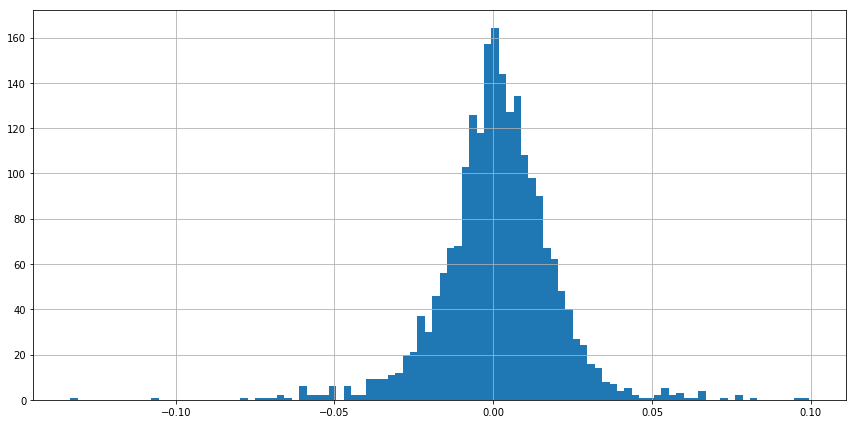

In [31]:
# Histogram for Portfolio log-return
# bins:  number of vertical blocks

df_portfo['Log-return%'].hist(bins=100,figsize=(12,6))
plt.tight_layout()

## Corrleation

In [32]:
df_concat = df_portfo.iloc[:,0:5]
df_concat.tail()

,NFLX.Position_Value,AMZN.Position_Value,NVDA.Position_Value,ADBE.Position_Value,AAPL.Position_Value
date,,,,,
2018-07-16,104837.801173,27221.657954,28989.326840,13733.081693,14043.050151
2018-07-17,99340.413477,27541.896938,29630.549259,13928.821785,14082.771732
2018-07-18,98201.668882,27526.811053,29398.120732,14008.088434,14005.535324
2018-07-19,95348.262888,27079.462285,29436.664156,13894.850364,14114.401880
2018-07-20,94515.801322,27090.365945,29303.514146,13887.301159,14082.036147


In [33]:
df_concat.corr()

,NFLX.Position_Value,AMZN.Position_Value,NVDA.Position_Value,ADBE.Position_Value,AAPL.Position_Value
NFLX.Position_Value,1.000000,0.974596,0.931542,0.980457,0.886809
AMZN.Position_Value,0.974596,1.000000,0.944358,0.985172,0.907940
NVDA.Position_Value,0.931542,0.944358,1.000000,0.944592,0.839422
ADBE.Position_Value,0.980457,0.985172,0.944592,1.000000,0.926798
AAPL.Position_Value,0.886809,0.907940,0.839422,0.926798,1.000000


In [34]:
# Concat along columns!

df_daychg = pd.concat((df[str(name+'.Return%')] for name,df in zip(symbol_list,chip_list)),axis=1)
df_daychg.tail()

,NFLX.Return%,AMZN.Return%,NVDA.Return%,ADBE.Return%,AAPL.Return%
date,,,,,
2018-07-16,0.011824,0.005218,-0.004492,-0.015120,-0.002195
2018-07-17,-0.052437,0.011764,0.022119,0.014253,0.002829
2018-07-18,-0.011463,-0.000548,-0.007844,0.005691,-0.005484
2018-07-19,-0.029057,-0.016251,0.001311,-0.008084,0.007773
2018-07-20,-0.008731,0.000403,-0.004523,-0.000543,-0.002293


In [35]:
df_daychg.corr()

,NFLX.Return%,AMZN.Return%,NVDA.Return%,ADBE.Return%,AAPL.Return%
NFLX.Return%,1.000000,0.354698,0.237296,0.234031,0.172665
AMZN.Return%,0.354698,1.000000,0.322629,0.405391,0.345580
NVDA.Return%,0.237296,0.322629,1.000000,0.406003,0.347904
ADBE.Return%,0.234031,0.405391,0.406003,1.000000,0.345565
AAPL.Return%,0.172665,0.345580,0.347904,0.345565,1.000000


In [36]:
# Annualized Covariance

252*df_daychg.cov()

,NFLX.Return%,AMZN.Return%,NVDA.Return%,ADBE.Return%,AAPL.Return%
NFLX.Return%,0.289152,0.059035,0.050157,0.034586,0.023434
AMZN.Return%,0.059035,0.095802,0.039253,0.034484,0.026997
NVDA.Return%,0.050157,0.039253,0.154508,0.043860,0.034516
ADBE.Return%,0.034586,0.034484,0.043860,0.075530,0.023970
AAPL.Return%,0.023434,0.026997,0.034516,0.023970,0.063703


In [37]:
# Log return dataframe

df_logchg = pd.concat((df[str(name+'.Log-return%')] for name,df in zip(symbol_list,chip_list)),axis=1)
df_logchg.tail()

,NFLX.Log-return%,AMZN.Log-return%,NVDA.Log-return%,ADBE.Log-return%,AAPL.Log-return%
date,,,,,
2018-07-16,0.011755,0.005204,-0.004502,-0.015236,-0.002198
2018-07-17,-0.053862,0.011695,0.021878,0.014153,0.002825
2018-07-18,-0.011529,-0.000548,-0.007875,0.005675,-0.005500
2018-07-19,-0.029487,-0.016385,0.001310,-0.008117,0.007743
2018-07-20,-0.008769,0.000403,-0.004534,-0.000543,-0.002296


In [38]:
# Annualized Covariance for log-return 

252*df_logchg.cov()

,NFLX.Log-return%,AMZN.Log-return%,NVDA.Log-return%,ADBE.Log-return%,AAPL.Log-return%
NFLX.Log-return%,0.286140,0.059094,0.051000,0.034799,0.024786
AMZN.Log-return%,0.059094,0.095017,0.039587,0.034662,0.026953
NVDA.Log-return%,0.051000,0.039587,0.150198,0.044110,0.034577
ADBE.Log-return%,0.034799,0.034662,0.044110,0.075833,0.024058
AAPL.Log-return%,0.024786,0.026953,0.034577,0.024058,0.063807


# Random weight allocation

## Randomization for one single run

In [39]:
# Symbols in the portfolio
print('Components:'+str(symbol_list))
print('\n')

# Random weights & normalized weights to sum of unity
rand_weight = np.random.rand(5)
rand_weight = rand_weight / np.sum(rand_weight)

for name,weight in zip(symbol_list,rand_weight):
    print('Weight for %s: %1.4f'%(name,weight))

Components:['NFLX', 'AMZN', 'NVDA', 'ADBE', 'AAPL']


Weight for NFLX: 0.4017
Weight for AMZN: 0.1646
Weight for NVDA: 0.0381
Weight for ADBE: 0.1450
Weight for AAPL: 0.2506


In [40]:
# Mean-Variance & Sharpe Ratio computation with the random weights
# Use bilinear form computation for variance 

mean_log_weight = 252 * np.sum(df_logchg.mean()*rand_weight)
var_log_weight = 252 * np.dot(rand_weight, np.dot(df_logchg.cov(),rand_weight))
sd_log_weight = np.sqrt(var_log_weight)

annual_sharpe_weight = mean_log_weight/sd_log_weight

print('Mean Portfolio Return: %1.6f \n'%(mean_log_weight))
print('Portfolio Volatility: %1.6f \n'%(sd_log_weight))
print('Portfolio Sharpe Ratio: %1.6f \n'%(annual_sharpe_weight))


Mean Portfolio Return: 0.333909 

Portfolio Volatility: 0.283300 

Portfolio Sharpe Ratio: 1.178640 



## Randomization for 10,000 runs

In [41]:
from time import time
start_time = time()

num_sims = 10000

all_weights = np.zeros((num_sims,len(symbol_list)))
mean_log_arr = np.zeros(num_sims)
sd_log_arr = np.zeros(num_sims)
sharpe_arr = np.zeros(num_sims)

for num in range(num_sims):
    
    # Create, normalize & store random weights
    rand_weight = np.random.rand(len(symbol_list))
    rand_weight = rand_weight / np.sum(rand_weight)
    all_weights[num,:] = rand_weight
    
    # Mean-Variance & Sharpe Ratio Computation
    mean_log_arr[num] = 252 * np.sum(df_logchg.mean()*rand_weight)
    sd_log_arr[num] = np.sqrt(252 * np.dot(rand_weight, np.dot(df_logchg.cov(),rand_weight)))
    sharpe_arr[num] = mean_log_arr[num] / sd_log_arr[num]

end_time = time()
print('Time elapsed for %s simulation: %s'%(num_sims,end_time-start_time))

Time elapsed for 10000 simulation: 5.973596096038818


In [42]:
# Simulation results

max_index = sharpe_arr.argmax()
print('Max Sharpe Ratio: %1.4f \n'%(sharpe_arr.max()))
print('Min Sharpe Ratio: %1.4f \n'%(sharpe_arr.min()))
print('Index for Max Sharpe Ratio: %s\n'%(max_index))
print('Weight for Max Sharpe Ratio: %s \n'%(str(all_weights[max_index,:])))

Max Sharpe Ratio: 1.3074 

Min Sharpe Ratio: 0.9402 

Index for Max Sharpe Ratio: 6785

Weight for Max Sharpe Ratio: [ 0.13500184  0.27041355  0.12223557  0.14266293  0.32968611] 



## Scatter plot & Efficient Frontier by Simulation

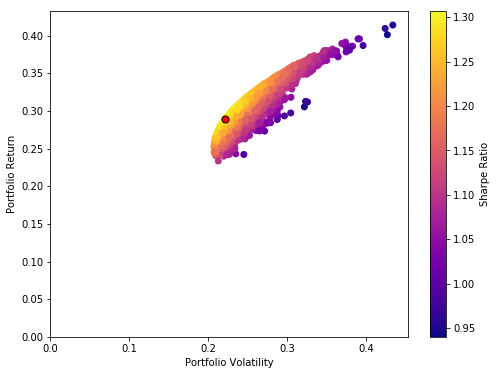

In [43]:
maxSR_sd = sd_log_arr[max_index]
maxSR_mean = mean_log_arr[max_index]

plt.figure(figsize=(8,6))
fig = plt.scatter(sd_log_arr,mean_log_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')

# Add red dot for max Sharpe Ratio
pt = plt.scatter(maxSR_sd,maxSR_mean,c='red',s=50,edgecolors='black')

plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show(fig,pt)

# Markowitz Optimization

In [44]:
# Use minimize function from scipy

from scipy.optimize import minimize

def check_unity(weights):
    """
    return 0 if sum of weights equals 1
    """
    return np.sum(weights)-1

def get_performKPI(weights):
    """
    Return array of mean return, portfolio volatility & Sharpe ratio given a weight
    """
    weights = np.array(weights)
    
    mean_log = 252 * np.dot(df_logchg.mean(),weights)
    sd_log = np.sqrt(252 * np.dot(weights, np.dot(df_logchg.cov(),weights)))
    sharpe = mean_log / sd_log
    
    return np.array([mean_log,sd_log,sharpe])


def get_neg_sharpe(weights):
    """
    Return the negative Sharpe ratio for given weight
    """
    return -get_performKPI(weights)[2]

# Initial guess set at uniform allocation
init_guess = [1/len(symbol_list)] * len(symbol_list)

# Bounds of elements of weight vector (each must be in [0,1])
bounds = tuple((0,1) for num in range(len(symbol_list)))

# Constraint Vector: dictionary object
constr = {'type':'eq','fun':check_unity}

# Store optimization result
start_opt = time()
opt_results = minimize(get_neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=constr)
end_opt = time()
print('Time elapsed for optimization: %1.4f'%(end_opt-start_opt))


Time elapsed for optimization: 0.0226


In [45]:
opt_results

     fun: -1.308079694529183
     jac: array([ 0.00071193,  0.00021696,  0.00021209, -0.00032559, -0.00042766])
 message: 'Optimization terminated successfully.'
    nfev: 37
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 0.147895  ,  0.25911084,  0.11971033,  0.15207794,  0.32120589])

In [46]:
opt_weight = opt_results.x

for name,ratio in zip(symbol_list,list(opt_weight)):
    print('Markowitz Weight for %s: %1.4f'%(name,ratio))

Markowitz Weight for NFLX: 0.1479
Markowitz Weight for AMZN: 0.2591
Markowitz Weight for NVDA: 0.1197
Markowitz Weight for ADBE: 0.1521
Markowitz Weight for AAPL: 0.3212


In [47]:
print('Annualized Return for Optimal Portfolio: %1.4f\n'%(get_performKPI(opt_weight)[0]))
print('Annualized Volatility for Optimal Portfolio: %1.4f\n'%(get_performKPI(opt_weight)[1]))
print('Annualized Sharpe Ratio for Optimal Portfolio: %1.4f\n'%(get_performKPI(opt_weight)[2]))

Annualized Return for Optimal Portfolio: 0.2915

Annualized Volatility for Optimal Portfolio: 0.2229

Annualized Sharpe Ratio for Optimal Portfolio: 1.3081



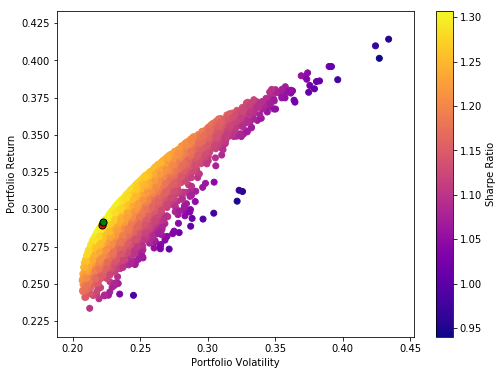

In [48]:
maxSR_sd = sd_log_arr[max_index]
maxSR_mean = mean_log_arr[max_index]

plt.figure(figsize=(8,6))
fig = plt.scatter(sd_log_arr,mean_log_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')

# Add red dot for max Sharpe Ratio
pt_1 = plt.scatter(maxSR_sd,maxSR_mean,c='red',s=50,edgecolors='black')
pt_2 = plt.scatter(get_performKPI(opt_weight)[1],get_performKPI(opt_weight)[0],c='green',s=50,edgecolors='black')
plt.show(pt_1,pt_2)

# Efficient Frontier by Optimization

In [49]:
# Objective function: portfolio volatility given fixed level of return
def get_vol(weights):
    return get_performKPI(weights)[1]

# Input Vector: annualized return from 0.25 to 0.45
return_vect = np.linspace(0.25,0.45,200)

# Record the minimal volatility for each 
frontier_vol = []

start_front = time()
for return_value in return_vect:
    # Set up two constraints for opt: weight unity & fixed return
    constr = ({'type':'eq','fun':check_unity},
              {'type':'eq','fun':lambda w: get_performKPI(w)[0] - return_value})
    
    # Store the result of minimising volatility
    min_vol_result = minimize(get_vol,init_guess,method='SLSQP',bounds=bounds,constraints=constr)
    frontier_vol.append(min_vol_result['fun'])

end_front = time()
print('Time elapsed for Efficient Frontier:%1.4f'%(end_front - start_front))


Time elapsed for Efficient Frontier:7.4993


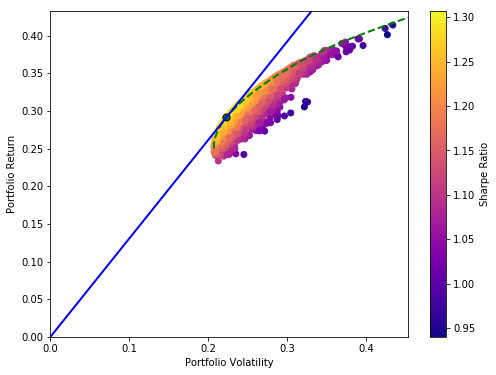

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(sd_log_arr,mean_log_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.ylim(ymin=0)
plt.xlim(xmin=0)

# Add frontier line
plt.plot(frontier_vol,return_vect,'g--',linewidth=2)
plt.scatter(get_performKPI(opt_weight)[1],get_performKPI(opt_weight)[0],c='green',s=50,edgecolors='black')

# Add indifferent line
xline = np.linspace(0,0.5,500)
yline = get_performKPI(opt_weight)[2] * xline
plt.plot(xline,yline,'b-',linewidth=2)